<a href="https://colab.research.google.com/github/SL-207/ViLT-Visual-Question-Answering/blob/main/VQA_with_ViLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import dependencies

In [1]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-

In [2]:
import requests
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import os

from transformers import ViltProcessor, ViltConfig, ViltForQuestionAnswering
from datasets import load_dataset

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### 2. Download GQA dataset

In [4]:
train_ds = load_dataset("vikhyatk/gqa", split="train_balanced")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/596 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

train_balanced-00000-of-00021.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train_balanced-00001-of-00021.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train_balanced-00002-of-00021.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train_balanced-00003-of-00021.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train_balanced-00004-of-00021.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train_balanced-00005-of-00021.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

train_balanced-00006-of-00021.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train_balanced-00007-of-00021.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train_balanced-00008-of-00021.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train_balanced-00009-of-00021.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train_balanced-00010-of-00021.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

train_balanced-00011-of-00021.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train_balanced-00012-of-00021.parquet:   0%|          | 0.00/480M [00:00<?, ?B/s]

train_balanced-00013-of-00021.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train_balanced-00014-of-00021.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

train_balanced-00015-of-00021.parquet:   0%|          | 0.00/476M [00:00<?, ?B/s]

train_balanced-00016-of-00021.parquet:   0%|          | 0.00/479M [00:00<?, ?B/s]

train_balanced-00017-of-00021.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train_balanced-00018-of-00021.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

train_balanced-00019-of-00021.parquet:   0%|          | 0.00/480M [00:00<?, ?B/s]

train_balanced-00020-of-00021.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

val_balanced-00000-of-00003.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

val_balanced-00001-of-00003.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

val_balanced-00002-of-00003.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

Generating train_balanced split:   0%|          | 0/72140 [00:00<?, ? examples/s]

Generating val_balanced split:   0%|          | 0/10234 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

In [5]:
print(train_ds[0])

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x270 at 0x78A486913390>, 'qa': [{'question': 'Is the sky dark?', 'answer': 'yes', 'fullAnswer': 'Yes, the sky is dark.'}, {'question': 'What is on the street?', 'answer': 'car', 'fullAnswer': 'The car is on the street.'}, {'question': 'Are there buses on the street?', 'answer': 'no', 'fullAnswer': 'No, there is a car on the street.'}, {'question': 'Is the car to the right of the other car waiting or driving?', 'answer': 'waiting', 'fullAnswer': 'The car is waiting.'}, {'question': 'Is the traffic signal on the right or on the left?', 'answer': 'left', 'fullAnswer': 'The traffic signal is on the left of the image.'}, {'question': 'Are the doors open or shut?', 'answer': 'shut', 'fullAnswer': 'The doors are shut.'}, {'question': 'Is it indoors or outdoors?', 'answer': 'outdoors', 'fullAnswer': 'It is outdoors.'}, {'question': 'Do you see buses or traffic lights there?', 'answer': 'yes', 'fullAnswer': 'Yes, there is a tra

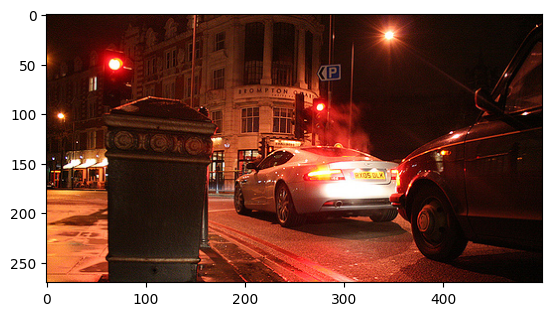

In [6]:
plt.imshow(train_ds[0]["image"])

### 3. Preprocess data

In [7]:
# can adjust model with config class
config = ViltConfig.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

In [8]:
class GQADataset(Dataset):
    def __init__(self, data, processor):
        self.data = data
        self.processor = processor
        self.samples = self.get_samples(data)

    def get_samples(self, data):
        # separate list of questions for each img into individual samples (img, question, answer)
        samples = []
        for image, qa_list in zip(data['image'], data['qa']):
            for question in qa_list:
                if question["answer"] in config.label2id.keys(): # skip answers with unlearned words
                    samples.append((image, question["question"], question["answer"]))
        return samples

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image, question, label = self.samples[idx]
        encoding = self.processor(image, question, padding="max_length", truncation=True, return_tensors="pt")

        # remove batch dimension
        for k,v in encoding.items():
          encoding[k] = v.squeeze()

        # add one-hot labels for correct word answers
        id = config.label2id[label]
        targets = torch.zeros(len(config.id2label))
        targets[id] = 1
        encoding["labels"] = targets
        return encoding

In [9]:
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")

dataset = GQADataset(data=train_ds[:100], processor=processor)

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [10]:
len(dataset)

2016

In [11]:
list(dataset[0])

['input_ids',
 'token_type_ids',
 'attention_mask',
 'pixel_values',
 'pixel_mask',
 'labels']

In [12]:
dataset[0]

{'input_ids': tensor([ 101, 2003, 1996, 3712, 2601, 1029,  102,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'pixel_values': tensor([[[-0.8745, -0.8275, -0.7961,  ..., -0.9216, -0.9294, -0.9294],
         [-0.7412, -0.7804, -0.8118,  ..., -0.9373, -0.9529, -0.9608],
         [-0.7333, -0.7725, -0.7569,  ..., -0.9451, -0.9294, -0.9137],
         ...,
         [ 0.8275,  0.9216,  0.9608,  ..., -0.9294, -0.9529, -0.9765],
         [ 0.8902,  0.9373,  0.9137,  ..., -0.9216, -0.9294, -0.9686],
         [ 0.92

In [13]:
def collate_fn(batch: list[dict]):
    input_ids = [d["input_ids"] for d in batch]
    token_type_ids = [d["token_type_ids"] for d in batch]
    attention_mask = [d["attention_mask"] for d in batch]
    pixel_values = [d['pixel_values'] for d in batch]
    labels = [d['labels'] for d in batch]

    # add padding and its mask to flattened patches
    encoding = processor.image_processor.pad(pixel_values, return_tensors="pt")

    batch = {}
    batch["input_ids"] = torch.stack(input_ids)
    batch["token_type_ids"] = torch.stack(token_type_ids)
    batch["attention_mask"] = torch.stack(attention_mask)
    batch["pixel_values"] = encoding["pixel_values"]
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = torch.stack(labels)
    return batch

In [14]:
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn,
                        num_workers=NUM_WORKERS, shuffle=True)

In [15]:
print(f"{len(dataloader)} batches of {dataloader.batch_size}")
batch = next(iter(dataloader))
for k,v in batch.items():
  print(k, v.shape)

126 batches of 16
input_ids torch.Size([16, 40])
token_type_ids torch.Size([16, 40])
attention_mask torch.Size([16, 40])
pixel_values torch.Size([16, 3, 512, 608])
pixel_mask torch.Size([16, 512, 608])
labels torch.Size([16, 3129])


### 4. Define Model

In [16]:
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm",
                                                 id2label=config.id2label,
                                                 label2id=config.label2id)
model.to(device)

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

ViltForQuestionAnswering(
  (vilt): ViltModel(
    (embeddings): ViltEmbeddings(
      (text_embeddings): TextEmbeddings(
        (word_embeddings): Embedding(30522, 768)
        (position_embeddings): Embedding(40, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (patch_embeddings): ViltPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
      )
      (token_type_embeddings): Embedding(2, 768)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViltEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViltLayer(
          (attention): ViltAttention(
            (attention): ViltSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=76

In [ ]:
# test output with batch_size of 1
sample = dataset[5]
batch = {k:v.unsqueeze(0).to(device) for k,v in sample.items()}
outputs = model(**batch)
print(outputs.loss)
print(outputs.logits.shape)

tensor(2276.7751, device='cuda:0', grad_fn=<MulBackward0>)
torch.Size([1, 3129])


In [ ]:
print(processor.decode(batch["input_ids"][0]))

[CLS] how is the water in the image? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
print("Pred: ", config.id2label[batch["labels"].argmax(1).item()])
print("Answer: ", config.id2label[outputs.logits.argmax(-1).item()])

Pred:  choppy
Answer:  red and white


### 5. Fine-tune model

In [19]:
def save_model(model, path):
    model.save_pretrained(path)
    processor.save_pretrained(path)
def load_model(path):
    model = ViltForQuestionAnswering.from_pretrained(path)
    processor = ViltProcessor.from_pretrained(path)
    return model, processor

In [20]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
EPOCHS = 20

model.train()
for epoch in range(EPOCHS):
    print(f"Epoch: {epoch}:\n------")
    epoch_loss = 0
    for batch in dataloader:
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = model(**batch)

        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if (epoch+1) % 5 == 0:
        save_model(model, f"model_ep{epoch+1}")

    print(f"- loss: {epoch_loss/len(dataloader)}\n")

Epoch: 0:
------
- loss: 580.5274837433345

Epoch: 1:
------
- loss: 60.28809974307106

Epoch: 2:
------
- loss: 27.58051374223497

Epoch: 3:
------
- loss: 17.61280554059952

Epoch: 4:
------
- loss: 13.132177519419837

Epoch: 5:
------
- loss: 10.695817531101287

Epoch: 6:
------
- loss: 9.212030380491226

Epoch: 7:
------
- loss: 8.230820413619753

Epoch: 8:
------
- loss: 7.507208816588871

Epoch: 9:
------
- loss: 6.871742581564282

Epoch: 10:
------
- loss: 6.3819230397542315

Epoch: 11:
------
- loss: 6.0096616669306675

Epoch: 12:
------
- loss: 5.697903061669971

Epoch: 13:
------
- loss: 5.440839901803032

Epoch: 14:
------
- loss: 5.228805110568092

Epoch: 15:
------
- loss: 5.044485001336961

Epoch: 16:
------
- loss: 4.875096059980846

Epoch: 17:
------
- loss: 4.70485356118944

Epoch: 18:
------
- loss: 4.540156833709232

Epoch: 19:
------
- loss: 4.352650791879684



### 6. Inference

In [63]:
sample = dataset[0]
processor.decode(sample['input_ids'])

'[CLS] is the sky dark? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [64]:
# answer
config.id2label[sample['labels'].argmax(-1).item()]

'yes'

In [65]:
batch = {k:v.unsqueeze(0).to(device) for k,v in sample.items()}
outputs = model(**batch)
y_probs = torch.sigmoid(outputs.logits)
top_probs, top_classes = torch.topk(y_probs, k=5)
for prob, class_idx in zip(top_probs[0].tolist(), top_classes[0].tolist()):
  print(prob, model.config.id2label[class_idx])

0.5474090576171875 yes
0.41635870933532715 no
0.005471458658576012 bottom
0.005231047049164772 chair
0.004618698265403509 left


In [26]:
# Evaluate on untrained data
val_dataset = GQADataset(data=train_ds[100:150], processor=processor)
val_dl = DataLoader(val_dataset, batch_size=16, collate_fn=collate_fn)

val_loss = 0
for batch in val_dl:
  batch = {k:v.to(device) for k,v in batch.items()}
  outputs = model(**batch)
  val_loss += outputs.loss.item()
print(f"Loss: {val_loss/len(val_dl)}")

Loss: 5.056361898047025
